# MDN Assignment

In [1]:
import numpy as np
import torch
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler


def generate_data(n_samples=1000):
    t = np.linspace(0, 1, n_samples)
    x = t + 0.3 * np.sin(2 * np.pi * t) + np.random.uniform(-0.1, 0.1, n_samples)
    return t.reshape(-1, 1), x.reshape(-1, 1)


x_train, y_train = generate_data()
x_test, y_test = generate_data(300)


x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

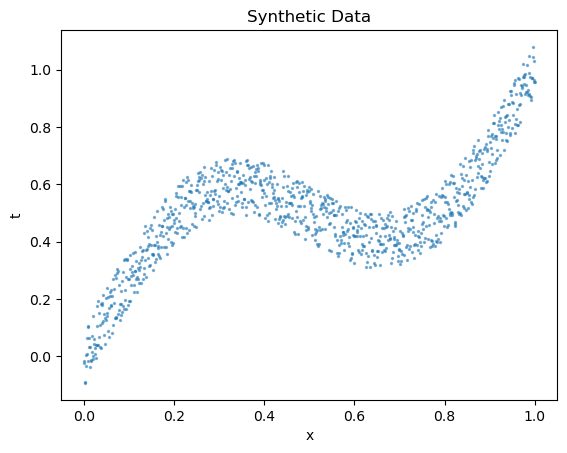

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, s=2, alpha=0.5)
plt.xlabel("x")
plt.ylabel("t")
plt.title("Synthetic Data")
plt.show()

In [3]:
import MDN
import torch.optim as optim

mdn = MDN.MDN(n_components=5)
optimizer = optim.Adam(mdn.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pi, mu, sigma = mdn(x_train)
    loss = MDN.mdn_loss(pi, mu, sigma, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.0380
Epoch 100, Loss: -1.3626
Epoch 200, Loss: -1.4191
Epoch 300, Loss: -1.4368
Epoch 400, Loss: -1.4481
Epoch 500, Loss: -1.4182
Epoch 600, Loss: -1.4351
Epoch 700, Loss: -1.4464
Epoch 800, Loss: -1.4528
Epoch 900, Loss: -1.4614


/var/folders/r5/1z730tqs20vcpg_44hk3n8rr0000gn/T/ipykernel_40766/3476919826.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pi, mu, sigma = mdn(torch.tensor(x_test, dtype=torch.float32))


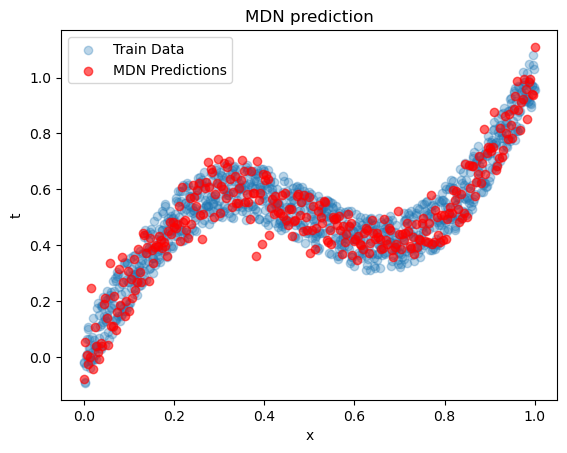

In [4]:
with torch.no_grad():
    pi, mu, sigma = mdn(torch.tensor(x_test, dtype=torch.float32))

input = x_test.squeeze()
sampled_y = []
for i in range(len(input)):
    idx = torch.multinomial(pi[i], 1).item()
    sampled_y.append(np.random.normal(mu[i, idx].item(), sigma[i, idx].item()))

plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.scatter(x_test, sampled_y, color="red", label="MDN Predictions", alpha=0.6)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.title("MDN prediction")
plt.show()

In [5]:
import deterministic
import torch.nn as nn

det_nn = deterministic.DeterministicNN()
optimizer = optim.Adam(det_nn.parameters(), lr=0.01)
mse = nn.MSELoss()
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pred_y = det_nn(x_train)
    loss = mse(pred_y, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, MSE Loss: {loss.item():.4f}")

Epoch 0, MSE Loss: 0.4259
Epoch 100, MSE Loss: 0.0133
Epoch 200, MSE Loss: 0.0038
Epoch 300, MSE Loss: 0.0033
Epoch 400, MSE Loss: 0.0033
Epoch 500, MSE Loss: 0.0033
Epoch 600, MSE Loss: 0.0033
Epoch 700, MSE Loss: 0.0033
Epoch 800, MSE Loss: 0.0033
Epoch 900, MSE Loss: 0.0033


/var/folders/r5/1z730tqs20vcpg_44hk3n8rr0000gn/T/ipykernel_40766/2119013574.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = det_nn(torch.tensor(x_test, dtype=torch.float32))


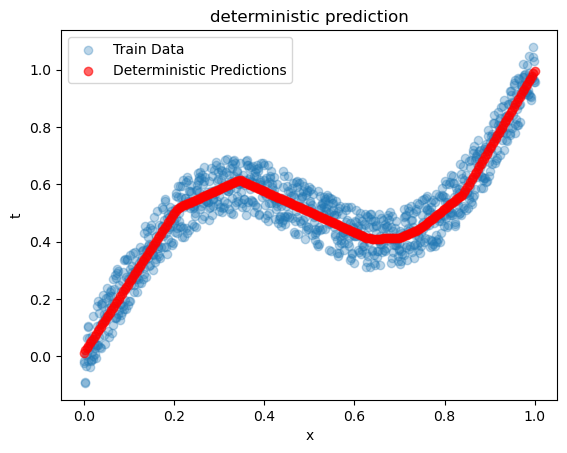

In [6]:
with torch.no_grad():
    y_pred = det_nn(torch.tensor(x_test, dtype=torch.float32))

plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.scatter(x_test, y_pred, color="red", label="Deterministic Predictions", alpha=0.6)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.title("deterministic prediction")
plt.show()

In [7]:
import Gaussian
import torch.optim as optim

single_gaussian_nn = Gaussian.SingleGaussianNN()
optimizer = optim.Adam(single_gaussian_nn.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    mu, sigma = single_gaussian_nn(x_train)
    loss = Gaussian.single_gaussian_loss(mu, sigma, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Single Gaussian Loss: {loss.item():.4f}")

Epoch 0, Single Gaussian Loss: 1.2831
Epoch 100, Single Gaussian Loss: -1.4042
Epoch 200, Single Gaussian Loss: -1.4402
Epoch 300, Single Gaussian Loss: -1.4419
Epoch 400, Single Gaussian Loss: -1.3911
Epoch 500, Single Gaussian Loss: -1.4432
Epoch 600, Single Gaussian Loss: -1.4441
Epoch 700, Single Gaussian Loss: -1.4336
Epoch 800, Single Gaussian Loss: -1.4433
Epoch 900, Single Gaussian Loss: -1.4446


/var/folders/r5/1z730tqs20vcpg_44hk3n8rr0000gn/T/ipykernel_40766/82043725.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu, sigma = single_gaussian_nn(torch.tensor(x_test, dtype=torch.float32))


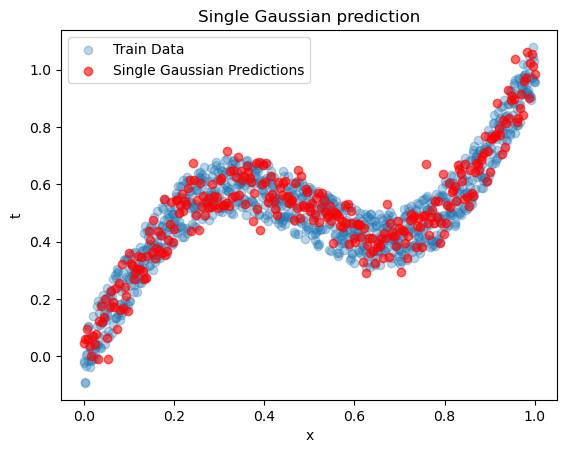

In [8]:
with torch.no_grad():
    mu, sigma = single_gaussian_nn(torch.tensor(x_test, dtype=torch.float32))

sampled_y = []
x_repeat = []

for i in range(len(x_test)):
    sampled_value = np.random.normal(mu[i].item(), sigma[i].item())
    sampled_y.append(sampled_value)
plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.scatter(
    x_test, sampled_y, color="red", label="Single Gaussian Predictions", alpha=0.6
)

plt.xlabel("x")
plt.ylabel("t")
plt.title("Single Gaussian prediction")
plt.legend()
plt.show()

In [9]:
def train_mdn_with_components(n_components):
    mdn = MDN.MDN(n_components=n_components)
    optimizer = optim.Adam(mdn.parameters(), lr=0.01)

    for epoch in range(1000):
        optimizer.zero_grad()
        pi, mu, sigma = mdn(x_train)
        loss = MDN.mdn_loss(pi, mu, sigma, y_train)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(
                f"Components {n_components}, Epoch {epoch}, MDN Loss: {loss.item():.4f}"
            )

    return mdn


mdn_2 = train_mdn_with_components(2)
mdn_3 = train_mdn_with_components(3)
mdn_5 = train_mdn_with_components(10)

Components 2, Epoch 0, MDN Loss: 1.0689
Components 2, Epoch 100, MDN Loss: -1.3864
Components 2, Epoch 200, MDN Loss: -1.4429
Components 2, Epoch 300, MDN Loss: -1.4474
Components 2, Epoch 400, MDN Loss: -1.4475
Components 2, Epoch 500, MDN Loss: -1.4473
Components 2, Epoch 600, MDN Loss: -1.4474
Components 2, Epoch 700, MDN Loss: -1.4487
Components 2, Epoch 800, MDN Loss: -1.4491
Components 2, Epoch 900, MDN Loss: -1.4496
Components 3, Epoch 0, MDN Loss: 1.1197
Components 3, Epoch 100, MDN Loss: -1.3900
Components 3, Epoch 200, MDN Loss: -1.4119
Components 3, Epoch 300, MDN Loss: -1.4389
Components 3, Epoch 400, MDN Loss: -1.4409
Components 3, Epoch 500, MDN Loss: -1.4419
Components 3, Epoch 600, MDN Loss: -1.4425
Components 3, Epoch 700, MDN Loss: -1.4156
Components 3, Epoch 800, MDN Loss: -1.4361
Components 3, Epoch 900, MDN Loss: -1.3647
Components 10, Epoch 0, MDN Loss: 1.1384
Components 10, Epoch 100, MDN Loss: -1.1277
Components 10, Epoch 200, MDN Loss: -1.4457
Components 10, Ep

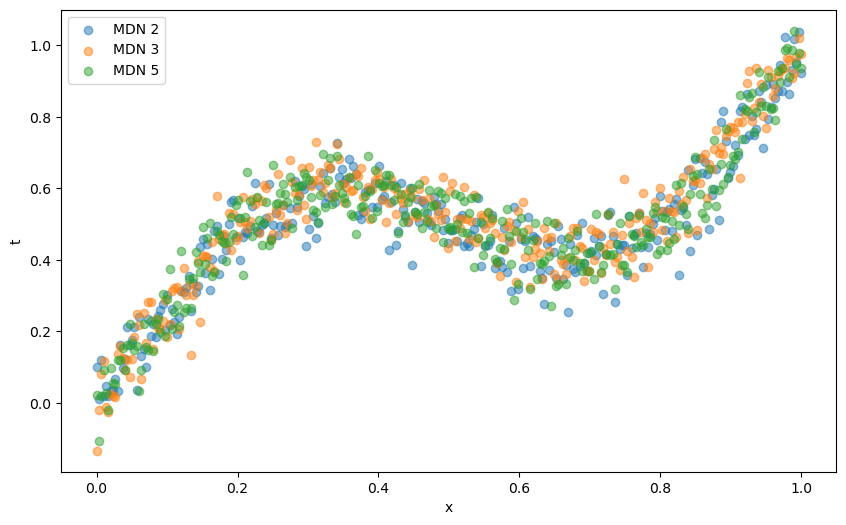

In [10]:
plt.figure(figsize=(10, 6))
models = [mdn_2, mdn_3, mdn_5]
labels = ["MDN 2", "MDN 3", "MDN 5"]
for model, label in zip(models, labels):
    with torch.no_grad():
        pi, mu, sigma = model(x_test)

    sampled_y = []
    for i in range(len(x_test)):
        idx = torch.multinomial(pi[i], 1).item()
        sampled_y.append(np.random.normal(mu[i, idx].item(), sigma[i, idx].item()))

    plt.scatter(x_test, sampled_y, alpha=0.5, label=label)

# plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

In [18]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_wine()
x, y = data.data, data.target.reshape(-1, 1)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [19]:
import HighDim

input_dim = x_train.shape[1]
mdn_highdim = HighDim.MDN(input_dim=input_dim)
optimizer = optim.Adam(mdn_highdim.parameters(), lr=0.001)
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pi, mu, sigma = mdn_highdim(x_train)
    loss = HighDim.mdn_loss(pi, mu, sigma, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, High-Dimensional MDN Loss: {loss.item():.4f}")

Epoch 0, High-Dimensional MDN Loss: 1.4071
Epoch 100, High-Dimensional MDN Loss: -1.0609
Epoch 200, High-Dimensional MDN Loss: -2.0753
Epoch 300, High-Dimensional MDN Loss: -1.9365
Epoch 400, High-Dimensional MDN Loss: -2.2387
Epoch 500, High-Dimensional MDN Loss: -1.6124
Epoch 600, High-Dimensional MDN Loss: -2.2846
Epoch 700, High-Dimensional MDN Loss: -2.5216
Epoch 800, High-Dimensional MDN Loss: -2.4599
Epoch 900, High-Dimensional MDN Loss: -2.2167


/var/folders/r5/1z730tqs20vcpg_44hk3n8rr0000gn/T/ipykernel_40766/2851407342.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x_test, dtype=torch.float32)


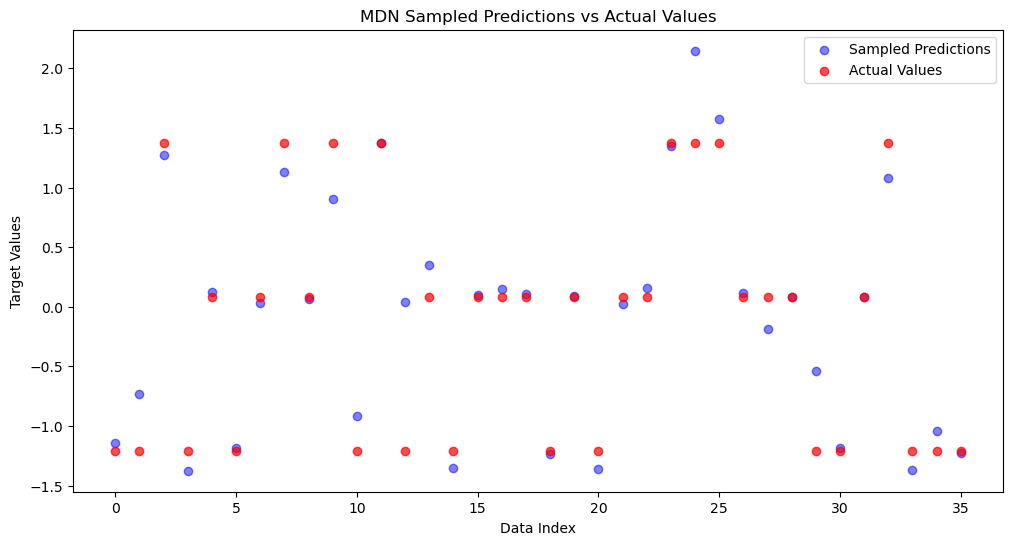

In [20]:
with torch.no_grad():
    pi_test, mu_test, sigma_test = mdn_highdim(
        torch.tensor(x_test, dtype=torch.float32)
    )

    sampled_y = []
    for i in range(len(x_test)):
        idx = torch.multinomial(pi_test[i], 1).item()
        sampled_y.append(
            np.random.normal(mu_test[i, idx].item(), sigma_test[i, idx].item())
        )

    plt.figure(figsize=(12, 6))

    plt.scatter(
        range(len(sampled_y)),
        sampled_y,
        alpha=0.5,
        label="Sampled Predictions",
        color="blue",
    )

    plt.scatter(
        range(len(y_test)),
        y_test.flatten(),
        color="red",
        label="Actual Values",
        alpha=0.7,
    )

    plt.xlabel("Data Index")
    plt.ylabel("Target Values")
    plt.title("MDN Sampled Predictions vs Actual Values")
    plt.legend()
    plt.show()

/Users/wu/miniconda3/envs/CS6956/lib/python3.13/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([142, 13])) that is different to the input size (torch.Size([142, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 1.0617
Epoch 100, Loss: 0.8743
Epoch 200, Loss: 0.8742
Epoch 300, Loss: 0.8742
Epoch 400, Loss: 0.8742
Epoch 500, Loss: 0.8742
Epoch 600, Loss: 0.8742
Epoch 700, Loss: 0.8742
Epoch 800, Loss: 0.8742
Epoch 900, Loss: 0.8742


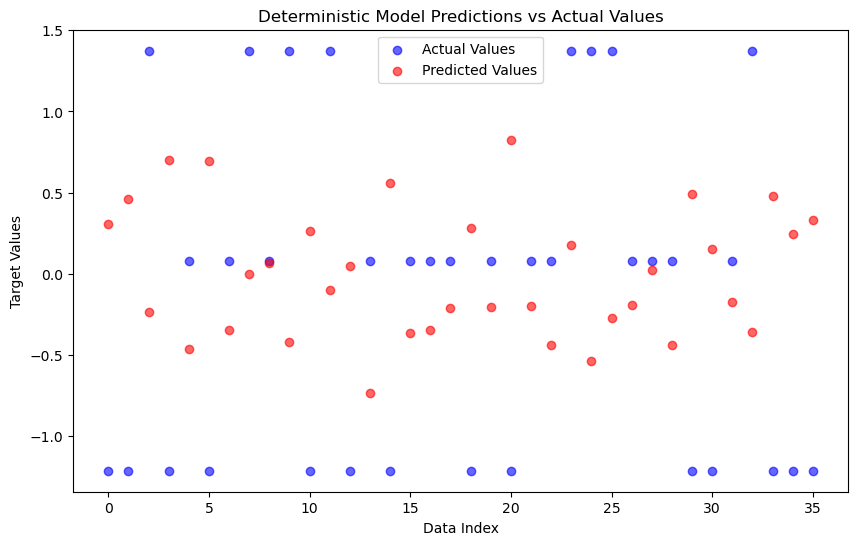

In [21]:
import HighDimDeter

deter_highdim = HighDimDeter.HighDeterministicNN()
optimizer = optim.Adam(deter_highdim.parameters(), lr=0.01)
criterion = nn.MSELoss()

num_epochs = 1000
for epoch in range(num_epochs):
    deter_highdim.train()
    optimizer.zero_grad()
    outputs = deter_highdim(x_train)
    loss = criterion(outputs, x_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

deter_highdim.eval()
with torch.no_grad():
    predictions = deter_highdim(x_test).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", color="blue", alpha=0.6)
plt.scatter(
    range(len(predictions)),
    predictions,
    label="Predicted Values",
    color="red",
    alpha=0.6,
)
plt.xlabel("Data Index")
plt.ylabel("Target Values")
plt.title("Deterministic Model Predictions vs Actual Values")
plt.legend()
plt.show()

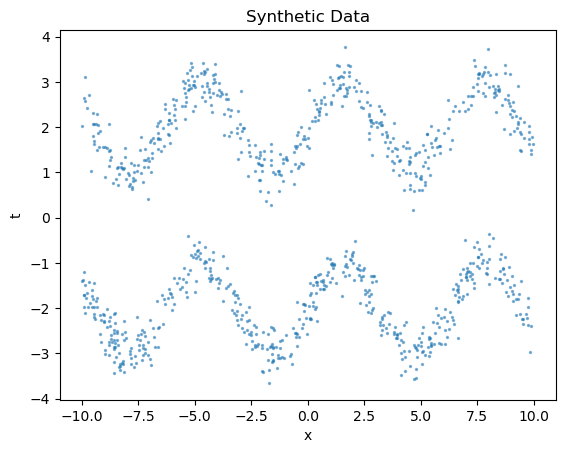

In [14]:
def generate_data2(n_samples=1000):
    x = np.random.uniform(-10, 10, size=n_samples)
    y = (
        np.sin(x)
        + 0.3 * np.random.randn(n_samples)
        + np.where(np.random.rand(n_samples) > 0.5, 2, -2)
    )
    return x.reshape(-1, 1), y.reshape(-1, 1)


x_train, y_train = generate_data2()
x_test, y_test = generate_data2(300)


x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

plt.scatter(x_train, y_train, s=2, alpha=0.5)
plt.xlabel("x")
plt.ylabel("t")
plt.title("Synthetic Data")
plt.show()

Epoch 0, Single Gaussian Loss: 2.9102
Epoch 100, Single Gaussian Loss: 2.1505
Epoch 200, Single Gaussian Loss: 2.1211
Epoch 300, Single Gaussian Loss: 2.1179
Epoch 400, Single Gaussian Loss: 2.1155
Epoch 500, Single Gaussian Loss: 2.1133
Epoch 600, Single Gaussian Loss: 2.1106
Epoch 700, Single Gaussian Loss: 2.1082
Epoch 800, Single Gaussian Loss: 2.1045
Epoch 900, Single Gaussian Loss: 2.1014


/var/folders/r5/1z730tqs20vcpg_44hk3n8rr0000gn/T/ipykernel_40766/2792234732.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu, sigma = single_gaussian_nn(torch.tensor(x_test, dtype=torch.float32))


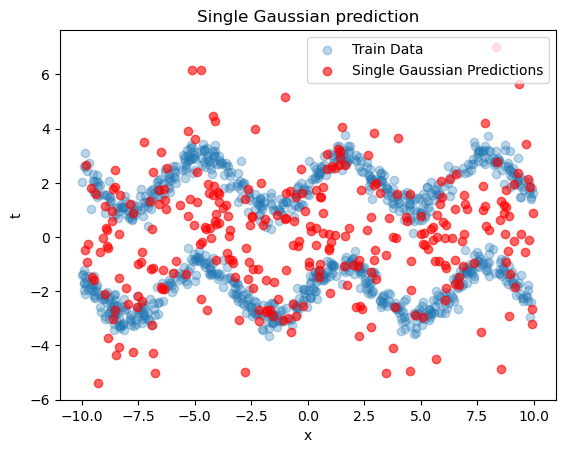

In [15]:
single_gaussian_nn = Gaussian.SingleGaussianNN()
optimizer = optim.Adam(single_gaussian_nn.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    mu, sigma = single_gaussian_nn(x_train)
    loss = Gaussian.single_gaussian_loss(mu, sigma, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Single Gaussian Loss: {loss.item():.4f}")

with torch.no_grad():
    mu, sigma = single_gaussian_nn(torch.tensor(x_test, dtype=torch.float32))

sampled_y = []
x_repeat = []

for i in range(len(x_test)):
    sampled_value = np.random.normal(mu[i].item(), sigma[i].item())
    sampled_y.append(sampled_value)
plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.scatter(
    x_test, sampled_y, color="red", label="Single Gaussian Predictions", alpha=0.6
)

plt.xlabel("x")
plt.ylabel("t")
plt.title("Single Gaussian prediction")
plt.legend()
plt.show()

Epoch 0, Loss: 3.0605
Epoch 100, Loss: 1.1528
Epoch 200, Loss: 1.0530
Epoch 300, Loss: 0.9300
Epoch 400, Loss: 0.9342
Epoch 500, Loss: 0.8555
Epoch 600, Loss: 0.9202
Epoch 700, Loss: 0.8396
Epoch 800, Loss: 0.8325
Epoch 900, Loss: 0.8194


/var/folders/r5/1z730tqs20vcpg_44hk3n8rr0000gn/T/ipykernel_40766/2235892722.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pi, mu, sigma = mdn(torch.tensor(x_test, dtype=torch.float32))


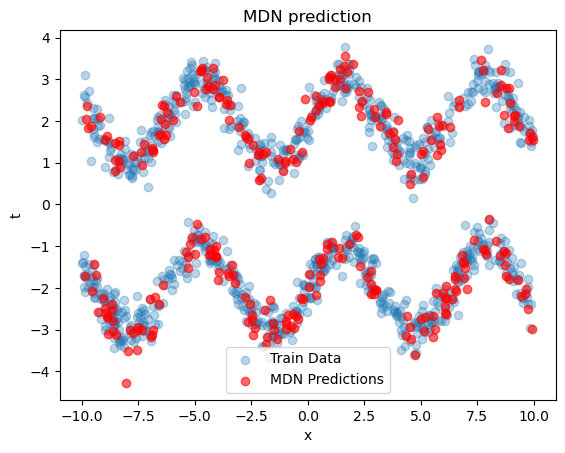

In [16]:
mdn = MDN.MDN(n_components=5)
optimizer = optim.Adam(mdn.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pi, mu, sigma = mdn(x_train)
    loss = MDN.mdn_loss(pi, mu, sigma, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


with torch.no_grad():
    pi, mu, sigma = mdn(torch.tensor(x_test, dtype=torch.float32))

input = x_test.squeeze()
sampled_y = []
for i in range(len(input)):
    idx = torch.multinomial(pi[i], 1).item()
    sampled_y.append(np.random.normal(mu[i, idx].item(), sigma[i, idx].item()))

plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.scatter(x_test, sampled_y, color="red", label="MDN Predictions", alpha=0.6)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.title("MDN prediction")
plt.show()

Components 2, Epoch 0, MDN Loss: 6.0237
Components 2, Epoch 100, MDN Loss: 2.1649
Components 2, Epoch 200, MDN Loss: 1.3923
Components 2, Epoch 300, MDN Loss: 1.1991
Components 2, Epoch 400, MDN Loss: 1.1781
Components 2, Epoch 500, MDN Loss: 1.1699
Components 2, Epoch 600, MDN Loss: 1.0961
Components 2, Epoch 700, MDN Loss: 1.0838
Components 2, Epoch 800, MDN Loss: 1.0296
Components 2, Epoch 900, MDN Loss: 1.0172
Components 3, Epoch 0, MDN Loss: 2.6140
Components 3, Epoch 100, MDN Loss: 1.3695
Components 3, Epoch 200, MDN Loss: 1.2617
Components 3, Epoch 300, MDN Loss: 1.0479
Components 3, Epoch 400, MDN Loss: 1.0052
Components 3, Epoch 500, MDN Loss: 0.9577
Components 3, Epoch 600, MDN Loss: 0.8835
Components 3, Epoch 700, MDN Loss: 0.8756
Components 3, Epoch 800, MDN Loss: 0.8714
Components 3, Epoch 900, MDN Loss: 0.8709
Components 4, Epoch 0, MDN Loss: 3.1780
Components 4, Epoch 100, MDN Loss: 1.1883
Components 4, Epoch 200, MDN Loss: 1.0447
Components 4, Epoch 300, MDN Loss: 0.942

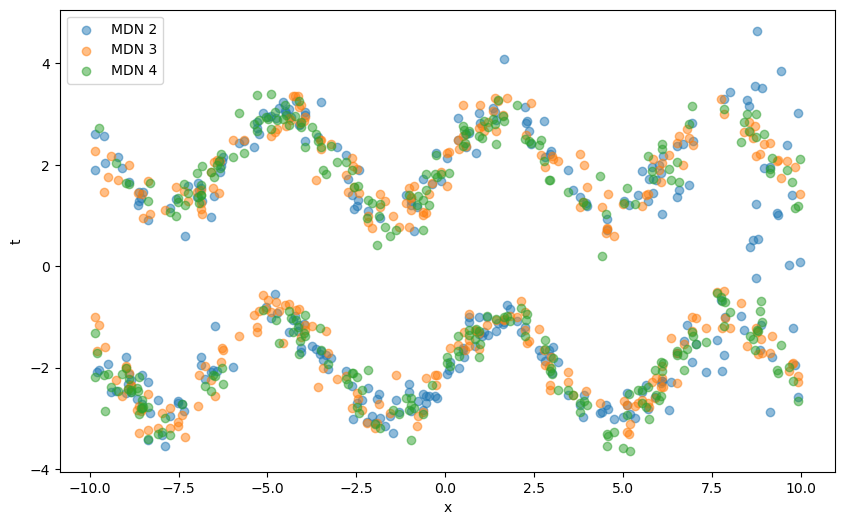

In [17]:
mdn_2 = train_mdn_with_components(2)
mdn_3 = train_mdn_with_components(3)
mdn_4 = train_mdn_with_components(4)

plt.figure(figsize=(10, 6))
models = [mdn_2, mdn_3, mdn_4]
labels = ["MDN 2", "MDN 3", "MDN 4"]
for model, label in zip(models, labels):
    with torch.no_grad():
        pi, mu, sigma = model(x_test)

    sampled_y = []
    for i in range(len(x_test)):
        idx = torch.multinomial(pi[i], 1).item()
        sampled_y.append(np.random.normal(mu[i, idx].item(), sigma[i, idx].item()))

    plt.scatter(x_test, sampled_y, alpha=0.5, label=label)

# plt.scatter(x_train, y_train, alpha=0.3, label="Train Data")
plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()